### Dataset

In [1]:
# Import library pandas untuk manipulasi dan analisis data
import pandas as pd

In [2]:
# Menampilkan dataset yang terdiri dari kolom 'Production (X)' dan 'Harvest Area (Y)'
data = pd.read_csv('R02_rice_field.csv')
data.head()

,Production (X),Harvest Area (Y)
0,1329536.0,323589.0
1,1299699.0,329041.0
2,1382905.0,339253.0
3,1419128.0,348223.0
4,1368074.0,337561.0


### Kolerasi

In [3]:
# Menghitung korelasi antara variabel 'Production (X)' dan 'Harvest Area (Y)'
data.corr()

,Production (X),Harvest Area (Y)
Production (X),1.000000,0.905622
Harvest Area (Y),0.905622,1.000000


### Spill Data

In [4]:
# Import library numpy untuk manipulasi array
import numpy as np
# Menyiapkan data untuk dimodelkan dengan variabel independen 'Production (X)' dan dependen 'Harvest Area (Y)'
productions_X = data['Production (X)'].values[:, np.newaxis]
harvest_area_Y = data['Harvest Area (Y)'].values

### Modelling

In [5]:
# Membuat model regresi linear menggunakan LinearRegression dari scikit-learn
from sklearn.linear_model import LinearRegression

# Inisialisasi model regresi linear
model = LinearRegression()

# Melatih model menggunakan data latih
model.fit(productions_X, harvest_area_Y)

LinearRegression()

### Testing

In [19]:
# Mempersiapkan data uji untuk prediksi, dalam hal ini, 'Production (X)' dengan nilai 14 dan 34
productions_X_test = [[14], [34]]

# Melakukan prediksi menggunakan model regresi linear
pred_harvest_area_Y = model.predict(productions_X_test)

# Menampilkan hasil prediksi
print("Prediksi Nilai: ", pred_harvest_area_Y)

Prediksi Nilai:  [69497.21464561 69500.84452157]


In [20]:
# Rumus Regresi -> y = ax + b 
# (a = koefisien, b = intercept)
# Menampilkan koefisien (a) dan intercept (b) dari model regresi
print("Koefisien: ", model.coef_)
print("Intercept: ", model.intercept_)

Koefisien:  [0.1814938]
Intercept:  69494.67373244301


In [21]:
# Menghitung nilai prediksi (y) menggunakan rumus regresi linear pada nilai x=27
y = model.coef_* 27 + model.intercept_
print(y)

[69499.57406498]


### Visualisasi

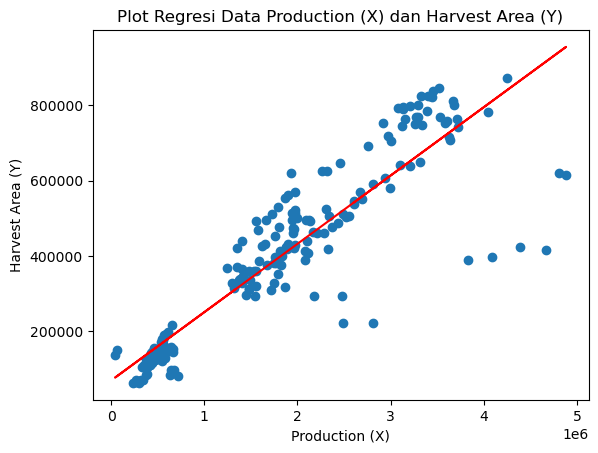

In [22]:
# Import library matplotlib untuk visualisasi data
import matplotlib.pyplot as plt 

# Prediksi Harvest Area (Y) menggunakan model pada seluruh data Production (X)
prediksi_harvest_area_Y = model.predict(productions_X)

# Membuat DataFrame baru untuk data hasil prediksi
dataframe_baru = pd.DataFrame({'Production (X)': data['Production (X)'], 'Harvest Area (Y)': prediksi_harvest_area_Y})

# Melakukan plotting scatter plot dan garis regresi pada data hasil prediksi
plt.scatter(data['Production (X)'], data['Harvest Area (Y)'])
plt.plot(dataframe_baru['Production (X)'], dataframe_baru['Harvest Area (Y)'], color='red')

# Menambahkan label dan judul pada plot
plt.xlabel('Production (X)')
plt.ylabel('Harvest Area (Y)')
plt.title('Plot Regresi Data Production (X) dan Harvest Area (Y)')

# Menampilkan plot
plt.show()

In [25]:
# Import library train_test_split untuk membagi data menjadi data pelatihan dan pengujian
from sklearn.model_selection import train_test_split

# Membagi data menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(productions_X, harvest_area_Y, test_size=0.2, random_state=42)

# Melatih model regresi linear pada data latih
model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
prediksi_harvest_area_Y_test = model.predict(X_test)

# Menghitung nilai R-squared untuk data uji yang sebenarnya
r2_test_actual = r2_score(y_test, prediksi_harvest_area_Y_test)

# Menampilkan nilai R-squared untuk data uji yang sebenarnya
print(f'R-squared untuk data uji yang sebenarnya: {r2_test_actual}')

R-squared untuk data uji yang sebenarnya: 0.8546683225108225
